In [1]:
import requests
from kafka import KafkaProducer
import json
import time
from json import dumps
import math 

# Kafka producer setup
producer = KafkaProducer(bootstrap_servers=['172.29.16.101:9092'],
                         value_serializer=lambda x: dumps(x).encode('utf-8'))
# HERE API setup
api_url = "https://router.hereapi.com/v8/routes"
api_key = "AtlHVpOjqsf6aI0Ik-Fd6kvsRb3AHEwIv7QNo_iEeZM"

# Routes data
berlin_routen = [
    {"start": "52.5160,13.3779", "ziel": "52.5206,13.3862"},
    {"start": "52.5308,13.3847", "ziel": "52.5264,13.3686"},
    {"start": "52.5233,13.4127", "ziel": "52.5171,13.3889"},
    {"start": "52.5411,13.4554", "ziel": "52.5200,13.4050"},
    {"start": "52.4831,13.4516", "ziel": "52.5209,13.3867"},
    {"start": "52.5109,13.4245", "ziel": "52.5345,13.3832"},
    {"start": "52.5064,13.2895", "ziel": "52.5167,13.3774"},
    {"start": "52.5377,13.4384", "ziel": "52.4985,13.4451"},
    {"start": "52.4660,13.3483", "ziel": "52.5327,13.4217"},
    {"start": "52.5489,13.3781", "ziel": "52.4960,13.3311"},
    {"start": "52.5096,13.3763", "ziel": "52.5192,13.4061"},
    {"start": "52.4973,13.3966", "ziel": "52.5074,13.4307"},
    {"start": "52.5238,13.4023", "ziel": "52.5080,13.3772"},
    {"start": "52.5179,13.4284", "ziel": "52.5054,13.3904"},
    {"start": "52.5120,13.3889", "ziel": "52.5208,13.3856"},
    {"start": "52.5200,13.4050", "ziel": "52.5248,13.3689"},
    {"start": "52.5170,13.3889", "ziel": "52.5200,13.4050"},
    {"start": "52.5240,13.3879", "ziel": "52.5300,13.4100"},
    {"start": "52.5290,13.3700", "ziel": "52.5200,13.4050"},
    {"start": "52.5150,13.3750", "ziel": "52.5300,13.4050"},
    {"start": "52.5220,13.3880", "ziel": "52.5200,13.4050"},
    {"start": "52.5270,13.3720", "ziel": "52.5150,13.4050"},
    {"start": "52.5240,13.3600", "ziel": "52.5200,13.4050"},
    {"start": "52.5230,13.3700", "ziel": "52.5200,13.4050"},
    {"start": "52.5250,13.3780", "ziel": "52.5200,13.4050"}
]

delhi_routen = [
    {"start": "28.7041,77.1025", "ziel": "28.6139,77.2090"},
    {"start": "28.7041,77.1025", "ziel": "28.6353,77.2250"},
    {"start": "28.6271,77.2166", "ziel": "28.6518,77.2219"},
    {"start": "28.6325,77.2185", "ziel": "28.6817,77.2426"},
    {"start": "28.5922,77.2507", "ziel": "28.5383,77.2595"},
    {"start": "28.5801,77.0569", "ziel": "28.6334,77.2200"},
    {"start": "28.6271,77.2150", "ziel": "28.5666,77.2044"},
    {"start": "28.6506,77.2305", "ziel": "28.6143,77.2274"},
    {"start": "28.6090,77.0375", "ziel": "28.6947,77.2945"},
    {"start": "28.5694,77.2315", "ziel": "28.6613,77.2166"},
    {"start": "28.6139,77.2090", "ziel": "28.6344,77.2205"},
    {"start": "28.6333,77.2250", "ziel": "28.6139,77.2025"},
    {"start": "28.5914,77.2507", "ziel": "28.7025,77.1907"},
    {"start": "28.5552,77.2026", "ziel": "28.7041,77.1025"},
    {"start": "28.6280,77.2145", "ziel": "28.5790,77.1762"},
    {"start": "28.6280,77.2150", "ziel": "28.6340,77.2160"},
    {"start": "28.6180,77.2080", "ziel": "28.6220,77.2140"},
    {"start": "28.6110,77.2090", "ziel": "28.6300,77.2210"},
    {"start": "28.6190,77.2110", "ziel": "28.6250,77.2170"},
    {"start": "28.6270,77.2130", "ziel": "28.6310,77.2190"},
    {"start": "28.6300,77.2160", "ziel": "28.6210,77.2150"},
    {"start": "28.6220,77.2180", "ziel": "28.6290,77.2230"},
    {"start": "28.6250,77.2100", "ziel": "28.6320,77.2240"},
    {"start": "28.6140,77.2140", "ziel": "28.6200,77.2190"},
    {"start": "28.6150,77.2150", "ziel": "28.6220,77.2160"}
]


london_routen = [
    {"start": "51.5074,-0.1278", "ziel": "51.5007,-0.1246"},
    {"start": "51.5074,-0.1278", "ziel": "51.5080,-0.1280"},
    {"start": "51.5014,-0.1419", "ziel": "51.5033,-0.1195"},
    {"start": "51.5113,-0.1195", "ziel": "51.4992,-0.1247"},
    {"start": "51.4989,-0.1747", "ziel": "51.5005,-0.1213"},
    {"start": "51.5080,-0.1246", "ziel": "51.5045,-0.0865"},
    {"start": "51.5000,-0.1214", "ziel": "51.5101,-0.1349"},
    {"start": "51.5085,-0.0805", "ziel": "51.4947,-0.1374"},
    {"start": "51.4975,-0.1214", "ziel": "51.5074,-0.1278"},
    {"start": "51.5125,-0.0961", "ziel": "51.5074,-0.1278"},
    {"start": "51.5026,-0.1406", "ziel": "51.5097,-0.0805"},
    {"start": "51.5286,-0.2417", "ziel": "51.5042,-0.0865"},
    {"start": "51.5204,-0.1346", "ziel": "51.5094,-0.1183"},
    {"start": "51.5096,-0.1348", "ziel": "51.5014,-0.1423"},
    {"start": "51.5048,-0.1070", "ziel": "51.5081,-0.1246"},
    {"start": "51.5070,-0.1350", "ziel": "51.5110,-0.1200"},
    {"start": "51.5130,-0.1400", "ziel": "51.5060,-0.1210"},
    {"start": "51.5080,-0.1320", "ziel": "51.5090,-0.1190"},
    {"start": "51.5050,-0.1380", "ziel": "51.5070,-0.1240"},
    {"start": "51.5090,-0.1400", "ziel": "51.5060,-0.1250"},
    {"start": "51.5075,-0.1330", "ziel": "51.5050,-0.1190"},
    {"start": "51.5110,-0.1360", "ziel": "51.5080,-0.1220"},
    {"start": "51.5090,-0.1390", "ziel": "51.5070,-0.1180"},
    {"start": "51.5100,-0.1320", "ziel": "51.5080,-0.1200"},
    {"start": "51.5060,-0.1380", "ziel": "51.5070,-0.1210"}
]

# Function to get data from HERE API with a desired length constraint
def get_data_from_here_api(start, ziel):
    params = {
        "transportMode": "car",
        "origin": start,
        "destination": ziel,
        "return": "summary",
        "apikey": api_key
    }
    response = requests.get(api_url, params=params)
    data = response.json()
    return data

# Function to adjust route to fit the desired length (approximately 10 km)
def adjust_route(route):
    start_coords = [float(coord) for coord in route['start'].split(',')]
    ziel_coords = [float(coord) for coord in route['ziel'].split(',')]
    
    # Calculate the distance between start and ziel
    current_length = distance_between_points(start_coords, ziel_coords)
    desired_length = 10.0  # Desired length in km
    
    # Scale the vector from start to ziel to achieve desired_length
    scale_factor = desired_length / current_length
    new_ziel_coords = [
        start_coords[0] + (ziel_coords[0] - start_coords[0]) * scale_factor,
        start_coords[1] + (ziel_coords[1] - start_coords[1]) * scale_factor
    ]
    
    route['ziel'] = f"{new_ziel_coords[0]},{new_ziel_coords[1]}"
    return route

# Helper function to calculate distance between two points in km (Haversine formula)
def distance_between_points(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371.0  # Radius of the Earth in km
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) * math.sin(dlon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    return distance

# Function to process routes and send data to Kafka
def send_routes_to_kafka(routes, topic_name):
    for route in routes:
        route = adjust_route(route)
        start = route["start"]
        ziel = route["ziel"]
        data = get_data_from_here_api(start, ziel)
        producer.send(topic_name, data)
        print(f"Sent data for route from {start} to {ziel}")
        time.sleep(1)  # To avoid hitting API rate limits

# Send Berlin routes data to Kafka
send_routes_to_kafka(berlin_routen, 'berlin_routes')

# Send Delhi routes data to Kafka
send_routes_to_kafka(delhi_routen, 'delhi_routes')

# Send London routes data to Kafka
send_routes_to_kafka(london_routen, 'london_routes')

# Close the producer
producer.close()


Sent data for route from 52.5160,13.3779 to 52.57655637712359,13.487164767418571
Sent data for route from 52.5308,13.3847 to 52.49394800774192,13.249855210146483
Sent data for route from 52.5233,13.4127 to 52.487905401745145,13.27683041315073
Sent data for route from 52.5411,13.4554 to 52.490116260159304,13.33361893421937
Sent data for route from 52.4831,13.4516 to 52.54527248510363,13.344854119491378
Sent data for route from 52.5109,13.4245 to 52.572466165534976,13.316759210313796
Sent data for route from 52.5064,13.2895 to 52.523403025886864,13.434603492762667
Sent data for route from 52.5377,13.4384 to 52.44825033451515,13.4536885907844
Sent data for route from 52.4660,13.3483 to 52.54071566763215,13.430520839643174
Sent data for route from 52.5489,13.3781 to 52.46978770250502,13.307811191261546
Sent data for route from 52.5096,13.3763 to 52.5516748649732,13.506907393354336
Sent data for route from 52.4973,13.3966 to 52.53664753421928,13.529446625433481
Sent data for route from 52.5

In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Kafka connection settings
kafka_bootstrap_servers = "172.29.16.101:9092"

kafka_topics = ["berlin_routes", "delhi_routes", "london_routes"]



# Initialize Spark session
spark = SparkSession.builder \
    .appName("KafkaSparkStreaming") \
    .getOrCreate()

# Define schema for the JSON data
location_schema = StructType([
    StructField("lat", FloatType(), True),
    StructField("lng", FloatType(), True)
])

place_schema = StructType([
    StructField("type", StringType(), True),
    StructField("location", location_schema, True),
    StructField("originalLocation", location_schema, True)
])

time_place_schema = StructType([
    StructField("time", StringType(), True),
    StructField("place", place_schema, True)
])

summary_schema = StructType([
    StructField("duration", IntegerType(), True),
    StructField("length", IntegerType(), True),
    StructField("baseDuration", IntegerType(), True)
])

transport_schema = StructType([
    StructField("mode", StringType(), True)
])

section_schema = StructType([
    StructField("id", StringType(), True),
    StructField("type", StringType(), True),
    StructField("departure", time_place_schema, True),
    StructField("arrival", time_place_schema, True),
    StructField("summary", summary_schema, True),
    StructField("transport", transport_schema, True)
])

route_schema = StructType([
    StructField("id", StringType(), True),
    StructField("sections", ArrayType(section_schema), True)
])

data_schema = StructType([
    StructField("routes", ArrayType(route_schema), True)
])

# Read raw data from Kafka topics
df_raw = spark.read.format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", ",".join(kafka_topics)) \
    .load()

# Add a column for the topic name
df_raw = df_raw.withColumn("topic", col("topic"))


# Convert value column to string and parse JSON
df_parsed = df_raw.select(from_json(col("value").cast("string"), data_schema).alias("data"), col("topic"))

# Explode routes and sections to flatten the structure
df_exploded = df_parsed.selectExpr("explode(data.routes) as route", "topic") \
    .selectExpr("route.id as route_id", "explode(route.sections) as section", "topic") \
    .select(
        col("route_id"),
        col("section.id").alias("section_id"),
        col("section.type").alias("section_type"),
        col("section.departure.time").alias("departure_time"),
        col("section.departure.place.location.lat").alias("departure_lat"),
        col("section.departure.place.location.lng").alias("departure_lng"),
        col("section.arrival.time").alias("arrival_time"),
        col("section.arrival.place.location.lat").alias("arrival_lat"),
        col("section.arrival.place.location.lng").alias("arrival_lng"),
        col("section.summary.duration").alias("duration"),
        col("section.summary.length").alias("length"),
        col("section.summary.baseDuration").alias("base_duration"),
        col("section.transport.mode").alias("transport_mode"),
        col("topic")
    )


# Show the parsed and flattened data
df_exploded.show(truncate=False)

# Example analysis: average duration per city
df_avg_duration = df_exploded.groupBy("topic").agg(avg("duration").alias("avg_duration"))
df_avg_duration.toPandas()


# Save the exploded dataframe to a CSV file
#df_exploded.write.csv("traffic_3.csv", header=True)

# Stop Spark session


24/06/19 13:40:38 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


+------------------------------------+------------------------------------+------------+-------------------------+-------------+-------------+-------------------------+-----------+-----------+--------+------+-------------+--------------+-------------+
|route_id                            |section_id                          |section_type|departure_time           |departure_lat|departure_lng|arrival_time             |arrival_lat|arrival_lng|duration|length|base_duration|transport_mode|topic        |
+------------------------------------+------------------------------------+------------+-------------------------+-------------+-------------+-------------------------+-----------+-----------+--------+------+-------------+--------------+-------------+
|55fce59b-6276-4048-93d2-9e9158f70b7d|2bc23930-08f9-4329-bfde-20e63ca23f8c|vehicle     |2024-06-19T13:24:57+01:00|51.507427    |-0.1280207   |2024-06-19T14:01:01+01:00|51.42105   |-0.0869301 |2164    |12259 |1657         |car           |london_

24/06/19 13:40:39 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


,topic,avg_duration
0,london_routes,2702.54
1,delhi_routes,2226.90
2,berlin_routes,2054.08


In [28]:
df_exploded.toPandas()

24/06/19 13:40:48 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


,route_id,section_id,section_type,departure_time,departure_lat,departure_lng,arrival_time,arrival_lat,arrival_lng,duration,length,base_duration,transport_mode,topic
0,55fce59b-6276-4048-93d2-9e9158f70b7d,2bc23930-08f9-4329-bfde-20e63ca23f8c,vehicle,2024-06-19T13:24:57+01:00,51.507427,-0.128021,2024-06-19T14:01:01+01:00,51.421051,-0.086930,2164,12259,1657,car,london_routes
1,8fe4d6db-d91c-4cc1-bf2b-d9f56f679020,c9f8584c-4071-4ac3-822a-053249cf66e6,vehicle,2024-06-19T13:24:58+01:00,51.507427,-0.128021,2024-06-19T14:07:31+01:00,51.595100,-0.157134,2553,11540,1549,car,london_routes
2,ecd7b6be-491f-48d9-b388-9b4286aa8f88,9b3c9244-2d11-457f-b340-56bb6f98f96b,vehicle,2024-06-19T13:24:59+01:00,51.502171,-0.141570,2024-06-19T14:04:17+01:00,51.513523,0.001297,2358,12684,1535,car,london_routes
3,dee370be-a13b-4179-a811-35abbd736780,9a5d8fd3-9702-41b5-a637-6a1ff49458eb,vehicle,2024-06-19T13:25:01+01:00,51.511219,-0.119432,2024-06-19T14:08:14+01:00,51.424458,-0.156809,2593,12079,1487,car,london_routes
4,568d3265-cf9e-4449-81e5-eb8cd96589b3,f658036a-14e9-4925-aa29-7a6bc8c58455,vehicle,2024-06-19T13:25:02+01:00,51.498932,-0.174234,2024-06-19T14:11:47+01:00,51.502468,-0.033320,2805,13476,1880,car,london_routes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,c05cb757-0b79-4d56-961b-98cdea0a7411,45c657b3-42dd-493e-aeb2-a2bc7b9b99e0,vehicle,2024-06-19T15:12:52+02:00,52.522003,13.388041,2024-06-19T15:44:01+02:00,52.509830,13.532440,1869,11101,1090,car,berlin_routes
146,fc45da19-6c29-4461-bc9d-8e500dcc60d2,b6473e7f-c255-429d-8738-dff50264e963,vehicle,2024-06-19T15:12:53+02:00,52.526981,13.371725,2024-06-19T15:43:26+02:00,52.480438,13.501100,1833,11996,1335,car,berlin_routes
147,8e168804-ec5f-4b62-bdf1-b43e1c8747ec,5d9327ff-650f-431a-ad80-071fb0fb1693,vehicle,2024-06-19T15:12:54+02:00,52.524147,13.360482,2024-06-19T15:53:01+02:00,52.510658,13.506202,2407,12944,1321,car,berlin_routes
148,390c678c-0421-4b6d-8aba-883e6171ef30,a0a30c2f-6610-4405-a4ef-d79954c59635,vehicle,2024-06-19T15:12:55+02:00,52.523022,13.370020,2024-06-19T15:51:50+02:00,52.510452,13.516380,2335,13257,1409,car,berlin_routes


### Durchschnittliche Länge der Routen pro Stadt

In [3]:
df_avg_length = df_exploded.groupBy("topic").agg(avg("length").alias("avg_length"))
df_avg_length.show()
df_avg_length.toPandas()

24/06/19 13:16:05 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.
24/06/19 13:16:06 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


+-------------+----------+
|        topic|avg_length|
+-------------+----------+
|london_routes|  13127.76|
| delhi_routes|  14446.06|
|berlin_routes|  13458.56|
+-------------+----------+



,topic,avg_length
0,london_routes,13127.76
1,delhi_routes,14446.06
2,berlin_routes,13458.56


### Maximale und minimale Dauer der Routen pro Stadt

In [4]:
df_max_min_duration = df_exploded.groupBy("topic").agg(
    max("duration").alias("max_duration"),
    min("duration").alias("min_duration")
)
df_max_min_duration.show()
df_max_min_duration.toPandas()


24/06/19 13:16:07 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


+-------------+------------+------------+
|        topic|max_duration|min_duration|
+-------------+------------+------------+
|london_routes|        3187|        2164|
| delhi_routes|        2945|        1700|
|berlin_routes|        2463|        1515|
+-------------+------------+------------+



24/06/19 13:16:08 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


,topic,max_duration,min_duration
0,london_routes,3187,2164
1,delhi_routes,2945,1700
2,berlin_routes,2463,1515


### Durchschnittliche erwartete Dauer vs. Tatsächliche Dauer pro Stadt

BaseDuration is the time "without realtime traffic on the route" and Duration includes current traffic reduced speeds.

In [5]:
df_avg_base_vs_actual_duration = df_exploded.groupBy("topic").agg(
    avg("base_duration").alias("avg_base_duration"),
    avg("duration").alias("avg_actual_duration")
)
df_avg_base_vs_actual_duration.show()
df_avg_base_vs_actual_duration.toPandas()


24/06/19 13:16:09 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


+-------------+-----------------+-------------------+
|        topic|avg_base_duration|avg_actual_duration|
+-------------+-----------------+-------------------+
|london_routes|          1707.02|            2702.54|
| delhi_routes|           1451.7|             2226.9|
|berlin_routes|          1410.86|            2054.08|
+-------------+-----------------+-------------------+



24/06/19 13:16:10 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


,topic,avg_base_duration,avg_actual_duration
0,london_routes,1707.02,2702.54
1,delhi_routes,1451.70,2226.90
2,berlin_routes,1410.86,2054.08


### Vergleich der Durschnittsgeschwindigkeit & Höchstgeschwindigkeit

In [6]:
df_speed = df_exploded.withColumn("speed", col("length") / (col("duration") / 3600)) \
    .groupBy("topic").agg(
        avg("speed").alias("avg_speed"),
        max("speed").alias("max_speed")
    )
df_speed.show()
df_speed.toPandas()


24/06/19 13:16:11 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


+-------------+------------------+-----------------+
|        topic|         avg_speed|        max_speed|
+-------------+------------------+-----------------+
|london_routes| 17570.29187278526|20393.90018484288|
| delhi_routes| 23509.72434843027|27738.41524573721|
|berlin_routes|23865.056832770828|45525.79185520362|
+-------------+------------------+-----------------+



24/06/19 13:16:11 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


,topic,avg_speed,max_speed
0,london_routes,17570.291873,20393.900185
1,delhi_routes,23509.724348,27738.415246
2,berlin_routes,23865.056833,45525.791855


In [31]:
import pandas as pd
from pyspark.sql.functions import stddev, median

# Convert Spark DataFrame to Pandas DataFrame for further analysis
pdf_exploded = df_exploded.toPandas()

# Median Duration per City
median_duration = df_exploded.groupBy("topic").agg(expr("percentile_approx(duration, 0.5)").alias("median_duration"))
pdf_median_duration = median_duration.toPandas()

# Standard Deviation of Duration and Length
stddev_duration_length = df_exploded.groupBy("topic").agg(
    stddev("duration").alias("stddev_duration"),
    stddev("length").alias("stddev_length")
)
pdf_stddev_duration_length = stddev_duration_length.toPandas()


# Duration/Length Ratio
df_ratio = df_exploded.withColumn("duration_length_ratio", col("duration") / col("length"))
pdf_ratio = df_ratio.groupBy("topic").agg(
    avg("duration_length_ratio").alias("avg_duration_length_ratio"),
    max("duration_length_ratio").alias("max_duration_length_ratio"),
    min("duration_length_ratio").alias("min_duration_length_ratio")
).toPandas()



# Visualize the results using Pandas DataFrames
print("Median Duration per City")
print(pdf_median_duration)

print("\nStandard Deviation of Duration and Length")
print(pdf_stddev_duration_length)

print("\nDuration/Length Ratio")
print(pdf_ratio)




24/06/19 13:44:05 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.
24/06/19 13:44:06 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.
24/06/19 13:44:06 WARN AdminClientConfig: These configurations '[key.deserializer, value.deserializer, enable.auto.commit, max.poll.records, auto.offset.reset]' were supplied but are not used yet.


Median Duration per City
           topic  median_duration
0  london_routes             2642
1   delhi_routes             2212
2  berlin_routes             2075

Standard Deviation of Duration and Length
           topic  stddev_duration  stddev_length
0  london_routes       254.299374    1069.038755
1   delhi_routes       292.691469    1714.778898
2  berlin_routes       216.798396    2151.136208

Duration/Length Ratio
           topic  avg_duration_length_ratio  max_duration_length_ratio  \
0  london_routes                   0.206407                   0.262510   
1   delhi_routes                   0.154821                   0.200242   
2  berlin_routes                   0.155236                   0.194385   

   min_duration_length_ratio  
0                   0.176523  
1                   0.129784  
2                   0.079076  


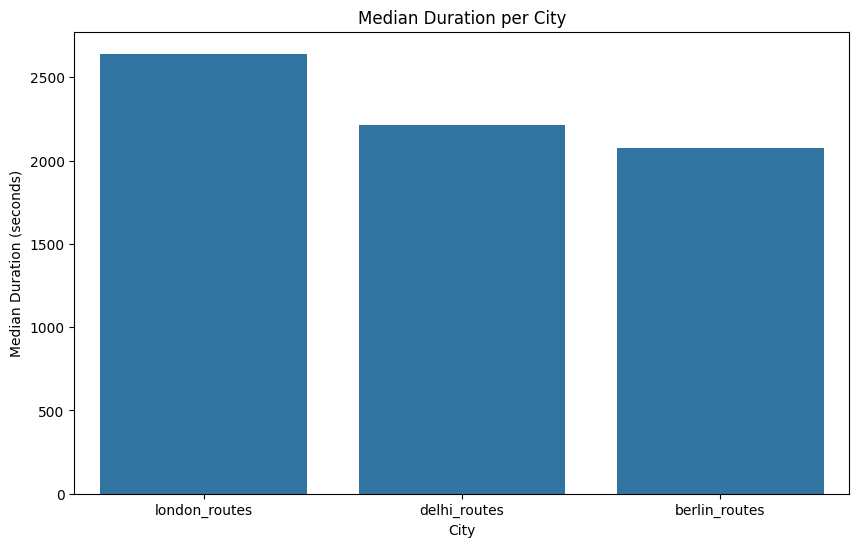

<Figure size 1000x600 with 0 Axes>

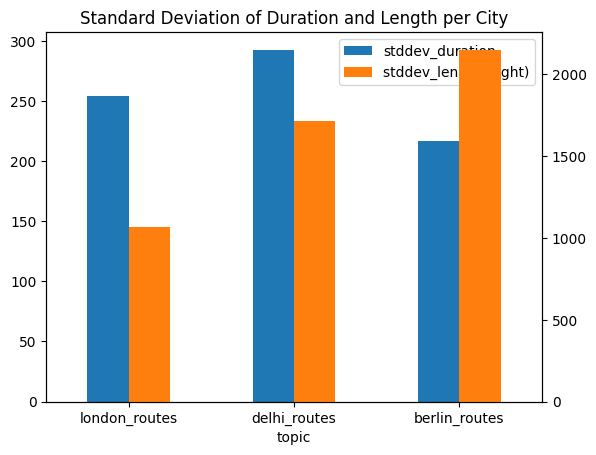

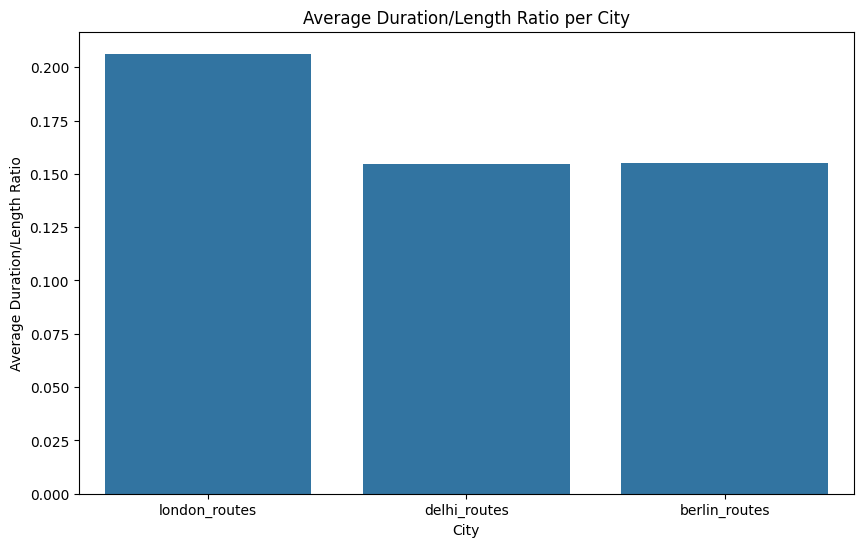

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisierung: Median Duration per City
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='median_duration', data=pdf_median_duration)
plt.title('Median Duration per City')
plt.xlabel('City')
plt.ylabel('Median Duration (seconds)')
plt.show()

# Visualisierung: Standard Deviation of Duration and Length
plt.figure(figsize=(10, 6))
pdf_stddev_duration_length.plot(kind='bar', x='topic', secondary_y=['stddev_length'], rot=0)
plt.title('Standard Deviation of Duration and Length per City')
plt.xlabel('City')
plt.show()


# Visualisierung: Duration/Length Ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='topic', y='avg_duration_length_ratio', data=pdf_ratio)
plt.title('Average Duration/Length Ratio per City')
plt.xlabel('City')
plt.ylabel('Average Duration/Length Ratio')
plt.show()


In [15]:
df_median_duration = spark.createDataFrame(pdf_median_duration)
df_stddev_duration_length = spark.createDataFrame(pdf_stddev_duration_length)
df_transport_mode_proportions = spark.createDataFrame(pdf_transport_mode_proportions)
df_ratio = spark.createDataFrame(pdf_ratio)

# Save to HDF5 using Pandas
pdf_median_duration.to_hdf("median_duration.h5", key='median_duration', mode='w')


In [17]:
pdf_median_duration.to_hdf("flat_files/median_duration.h5", key='median_duration', mode='w')


In [18]:
df_median_duration.write.parquet("flat_files/median_duration.parquet")


In [22]:
df_median_duration.show()


+-------------+---------------+
|        topic|median_duration|
+-------------+---------------+
|london_routes|           2642|
| delhi_routes|           2212|
|berlin_routes|           2075|
+-------------+---------------+

